In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
 # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Importing Libraries</h3>
</div>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Loading the DataSet</h3>
</div>


In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
column_list = list(df.columns)
print(column_list)


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3243,3665-JATSN,Female,0,No,No,19,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.70,710.05,No
3032,5696-EXCYS,Male,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,369.05,No
4675,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3262,5498-TXHLF,Female,0,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,87.45,2874.15,Yes
5149,3970-XGJDU,Female,0,No,No,62,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.20,1123.65,No


<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Data Exploration</h3>
</div>


In [9]:
# CustomerID is not an important feature so let's drop it!

df.drop('customerID',axis='columns',inplace=True)

In [10]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Total charges should be an float but it's an object. Let's change that

df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [14]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.shape

(7043, 20)

In [17]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [18]:
# Dropping 11 rows out of 7000 rows is not a big deal

df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [19]:
deleted_rows_TotalCharges = tuple(np.array(df.shape) - np.array(df1.shape))
print(deleted_rows_TotalCharges)

# (11, 0)

# So we can see we have excluded 11 rows while creating new dataframe

(11, 0)


In [20]:
df1.dtypes
# Here we can see TotalCharges is still Object we can change it into float

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [22]:
df1.TotalCharges.dtypes

dtype('float64')

<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Data Visualization</h3>
</div>


Text(0.5, 1.0, 'Customer Churn Prediction Visulaization')

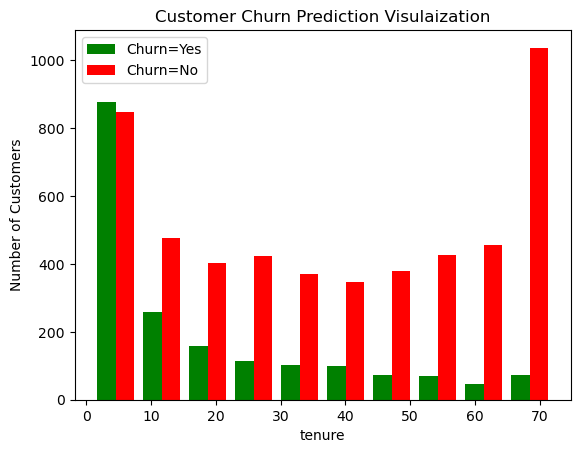

In [23]:
#  Plot based on tenure of customers

tenure_churn_no = df1[df1.Churn == 'No'].tenure

tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure


plt.hist([tenure_churn_yes, tenure_churn_no ],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visulaization")

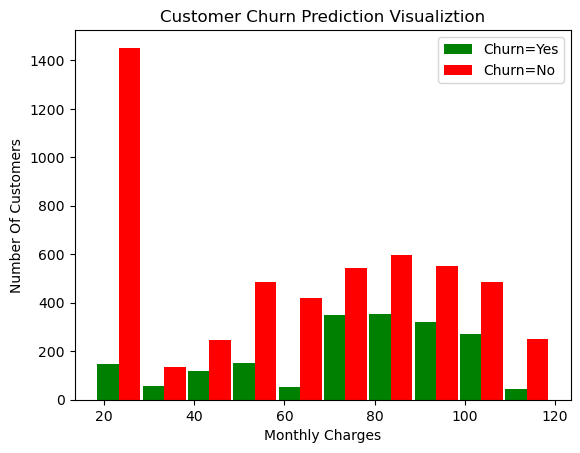

In [24]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Data Cleaning & Label Encoding</h3>
</div>


In [25]:

def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()} ')

In [26]:
print_unique_col_values(df)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 
Churn : ['No' 'Yes'] 


In [27]:
df1.replace('No internet service',"No",inplace=True)

df1.replace('No phone service', 'No',inplace=True)

In [28]:
print_unique_col_values(df1)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes'] 
OnlineBackup : ['Yes' 'No'] 
DeviceProtection : ['No' 'Yes'] 
TechSupport : ['No' 'Yes'] 
StreamingTV : ['No' 'Yes'] 
StreamingMovies : ['No' 'Yes'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [30]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df['gender'].replace({"Female":1,"Male":0},inplace=True)

In [32]:
df['gender'].unique()

array([1, 0])

In [33]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5984,Male,0,1,0,14,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2321,Female,1,0,0,65,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4395,Female,0,1,1,69,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1513,Female,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [36]:
df2.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Scaling</h3>
</div>


In [37]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
Te

<div style="display: flex; align-items: center; justify-content: center; background-color: #B5FF1C; padding: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); height: 30px;">
  <h3 style="font-size: 24px; font-weight: bold; color: #023047; margin: 0;">Train, Test, Split</h3>
</div>


In [39]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)




In [40]:
X_train.shape

(5625, 26)

In [41]:
X_test.shape

(1407, 26)

In [42]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,Female,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,Female,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,Male,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,Female,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,Male,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,Female,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,Male,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,Female,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,Male,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,Male,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [43]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [44]:
len(X_train.columns)

26

In [60]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your data into 'df2' DataFrame
# X should contain features (input data) without the target column 'Churn'
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Convert data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train.values)
y_train_tf = tf.convert_to_tensor(y_train.values)
X_test_tf = tf.convert_to_tensor(X_test.values)
y_test_tf = tf.convert_to_tensor(y_test.values)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(X_train_tf.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tf, y_train_tf, epochs=100)

# Convert TensorFlow tensors back to NumPy arrays
X_train_np = X_train_tf.numpy()
y_train_np = y_train_tf.numpy()
X_test_np = X_test_tf.numpy()
y_test_np = y_test_tf.numpy()


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7479
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8041
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accura

In [62]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7783


[0.4583256244659424, 0.778251588344574]

In [63]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.32031968],
       [0.64009494],
       [0.02882164],
       [0.7818012 ],
       [0.53395563]], dtype=float32)

In [64]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [65]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [67]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

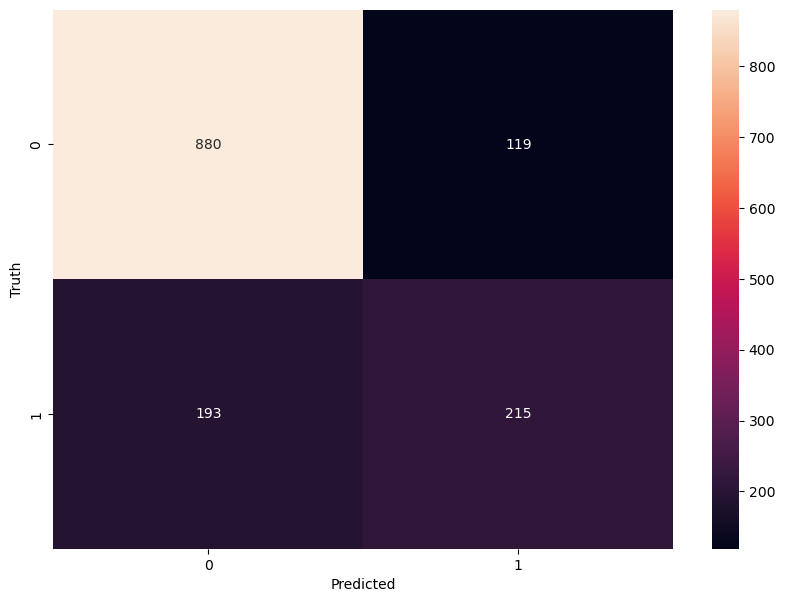

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
y_test.shape

(1407,)

<b>Accuracy</b>

In [71]:
round((891+221)/(891+221+108+187),2)

0.79

<b>Precision for 0 class. i.e. Precision for customers who did not churn
</b>

In [72]:
round(891/(891+187),2)


0.83

<b>Precision for 1 class. i.e. Precision for customers who actually churned

</b>

In [73]:
round(221/(221+108),2)


0.67

<b>Recall for 0 class

</b>


In [74]:
round(891/(891+108),2)


0.89

In [75]:
round(221/(221+187),2)


0.54